In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize'] = (5.0, 5.0)


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/lin_reg_data.csv')
data.head()

FileNotFoundError: ignored

In [ ]:
class LinearRegression:
    def __init__(self, X_data, Y_data, l, iterations):  # initialize all parameters
        self.X = X_data
        self.Y = Y_data
        # weight and bias
        self.m = 0
        self.c = 0
        self.L = l  # learning rate
        self.iter = iterations  # num of iterations
        self.n = float(len(self.X))  # size of data

    def cost(self, pred_y):  # cost function
        cost = np.sum(np.square(self.Y-pred_y))/(2*self.n)
        return(cost)

    def fit(self):
        self.history = np.zeros(self.iter)
        # updating values of m and c
        for i in range(self.iter):
            pred_y = self.m*self.X + self.c
            # print(pred_y)
            Dm = (-2/self.n)*(self.X*(self.Y-pred_y))
            Dc = (-2/self.n)*(self.Y-pred_y)
            # update
            self.m = self.m-Dm*self.L
            self.c = self.c-Dc*self.L
            # cost is calculated for every iteration
            self.history[i] = self.cost(pred_y)
            self.mse = self.MSE(self.Y, pred_y)

    def MSE(self, pred_y, Y):
        errors = Y-pred_y  # error is the difference between actual and predicted value
        # mean of sum of square of erros
        mse = np.sum(np.square(errors))/self.n
        return mse

    def results(self):
        # plt.title('minimisation of errors across the iterations')
        # a1.plot(self.history, color='red', label='Linear Regression')

        # making predictions
        final_y = self.m*self.X + self.c
        # plt.scatter(self.X, self.Y)
        # plt.title('regrssion line')
        # a2.plot([min(self.X), max(self.X)], [min(final_y), max(
        #     final_y)], color='red', label='Linear Regression')  # plotting the red line

        print('Mean Squared Error=', self.mse)
        return final_y


In [ ]:
class RidgeLinearRegression:
    def __init__(self, X_data, Y_data, l, l2, iterations):  # initialize all parameters
        self.X = X_data
        self.Y = Y_data
        # weight and bias
        self.m = 0
        self.c = 0
        self.L = l  # learning rate
        self.l2 = l2  # regularization parameter
        self.iter = iterations  # num of iterations
        self.n = float(len(self.X))  # size of data

    def cost(self, pred_y):  # cost function
        cost = np.sum(np.square(self.Y-pred_y))/(2*self.n) + \
            self.l2*np.sum(np.square(self.m))
        return (cost)

    def fit(self):
        self.history = np.zeros(self.iter)
        # updating values of m and c
        for i in range(self.iter):
            pred_y = self.m*self.X + self.c
            # print(pred_y)
            Dm = (-2/self.n)*(self.X*(self.Y-pred_y))+2*self.l2*self.m
            Dc = (-2/self.n)*(self.Y-pred_y)
            # update
            self.m = self.m-Dm*self.L
            self.c = self.c-Dc*self.L
            # cost is calculated for every iteration
            self.history[i] = self.cost(pred_y)
        self.mse = self.MSE(self.Y, pred_y)

    def MSE(self, pred_y, Y):
        errors = Y-pred_y  # error is the difference between actual and predicted value
        # mean of sum of square of erros
        mse = np.sum(np.square(errors))/self.n
        return mse

    def results(self):
        # plt.title('minimisation of errors across the iterations')
        # a1.plot(self.history, color = 'blue', label='Ridge Linear Regression')

        # making predictions
        final_y = self.m*self.X + self.c
        # plt.scatter(self.X, self.Y)
        # plt.title('regrssion line')
        # a2.plot([min(self.X), max(self.X)], [min(final_y), max(
        #     final_y)], color='blue', label='Ridge Linear Regression')  # plotting the red line

        print('Mean Squared Error=', self.mse)
        return final_y

In [ ]:
class LassoLinearRegression:
    def __init__(self, X_data, Y_data, l, l1, iterations):  # initialize all parameters
        self.X = X_data
        self.Y = Y_data
        # weight and bias
        self.m = np.random.randn(X_data.shape[0])
        self.c = 0
        self.L = l  # learning rate
        self.l1 = l1  # regularization parameter
        self.iter = iterations  # num of iterations
        self.n = float(len(X_data))  # size of data

    def cost(self, pred_y):  # cost function
        cost = np.sum(np.square(self.Y-pred_y)) / \
            (2*self.n) + self.l1*np.sum(self.m)
        return(cost)

    def fit(self):
        self.history = np.zeros(self.iter)
        pred_y = np.zeros((self.Y.shape))
        for j in range(self.iter):
            for i in range(0, len(self.X)):
                pred_y[i] = self.m[i]*self.X[i]+self.c
                if self.m[i] > 0:
                    Dm = (-2/self.n) * \
                        (self.X[i]*(self.Y[i]-pred_y[i]))-self.l1
                else:
                    Dm = (-2/self.n) * \
                        (self.X[i]*(self.Y[i]-pred_y[i]))+self.l1

                Dc = (-2/self.n)*(self.Y[i]-pred_y[i])
                # update
                self.m[i] = self.m[i]-Dm*self.L
                self.c = self.c-Dc*self.L
            self.history[j] = self.cost(pred_y)
        self.mse = self.MSE(self.Y, pred_y)

    def MSE(self, pred_y, Y):
        errors = Y-pred_y  # error is the difference between actual and predicted value
        # mean of sum of square of erros
        mse = np.sum(np.square(errors))/self.n
        return mse

    def results(self):

        # plt.title('minimisation of errors across the iterations')
        # a1.plot(self.history, color='green', label='Lasso Linear Regression')

        # making predictions
        final_y = self.m*self.X + self.c
        # plt.title('regrssion line')
        # a2.plot([min(self.X), max(self.X)], [min(final_y), max(
        #     final_y)], color='green', label='Lasso Linear Regression')  # plotting the red line

        print('Mean Squared Error=', self.mse)
        return final_y

In [ ]:
X = data.iloc[:, 0]
Y = data.iloc[:, 1]

x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.5, random_state=42)


In [ ]:
type (np.array(x_test))

numpy.ndarray

In [ ]:
fig = plt.figure(figsize=(20, 20))
a1 = fig.add_subplot(211)
a2 = fig.add_subplot(212)
a3 = fig.add_subplot(211)

Mean Squared Error= 0.28197110196795694
Mean Squared Error= 2.8936427145240047
Mean Squared Error= 0.00010031219101202956


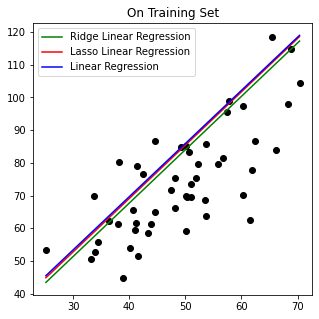

In [ ]:
l = LinearRegression(np.array(x_train), np.array(y_train), 0.005, 50)
la = LassoLinearRegression(np.array(x_train), np.array(y_train), 0.005, 1, 50)
r = RidgeLinearRegression(np.array(x_train), np.array(y_train), 0.005, 1, 50)
la.fit()
la_res = la.results()
r.fit()
r_res = r.results()
l.fit()
l_res = l.results()

plt.scatter(x_train, y_train, c='black')
plt.plot([min(r.X), max(r.X)], [min(r_res), max(r_res)], color='green', label='Ridge Linear Regression')
plt.plot([min(l.X), max(l.X)], [min(l_res), max(l_res)], color='red', label='Lasso Linear Regression')
plt.plot([min(la.X), max(la.X)], [min(la_res), max(la_res)], color='blue', label='Linear Regression')

plt.legend()
plt.title('On Training Set')
plt.show()

In [ ]:
la.X = x_test
la.Y = y_test
la_res = la.results()
r.X = x_test
r.Y = y_test
r_res = r.results()
l.X = x_test
l.Y = y_test
l_res = l.results()

plt.scatter(x_test, y_test, c='black')
plt.plot([min(r.X), max(r.X)], [min(r_res), max(r_res)], color='green', label='Ridge Linear Regression')
plt.plot([min(l.X), max(l.X)], [min(l_res), max(l_res)], color='red', label='Lasso Linear Regression')
plt.plot([min(la.X), max(la.X)], [min(la_res), max(la_res)], color='blue', label='Linear Regression')

plt.legend()
plt.title('On testing Set')
plt.show()

NameError: ignored